In [5]:
import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing
import random as rn

import seaborn as sns
import matplotlib.pyplot as plt



# from data import data_visualization, data_loading, data_preprocessing
# from models import annModels

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import  learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

# import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import concatenate
from sklearn.model_selection import StratifiedKFold

import joblib

2024-08-24 22:33:23.756785: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 22:33:23.770908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 22:33:23.787689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 22:33:23.792089: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 22:33:23.805252: I tensorflow/core/platform/cpu_feature_guar

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Load your dataset
df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv')

# Assume 'family' is the column with the target variable
X = df.drop(columns=['family'])
y = df['family']

# Convert labels to categorical (one-hot encoding)
num_classes = len(y.unique())
y = to_categorical(y, num_classes=num_classes)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
y_test.shape

(399, 10)

In [8]:
def predict_and_compile(model_paths, X_test, y_test):
    
    # Load models from the given paths
    X_test_cnn2d = np.reshape(X_test, (X_test.shape[0], 41, 1, 1))

    ann_model = load_model(model_paths[0])
    cnn1d_model = load_model(model_paths[1])
    cnn2d_model = load_model(model_paths[2])

    # Predict probabilities using each model
    ann_prob = ann_model.predict(X_test)
    cnn1d_prob = cnn1d_model.predict(X_test)
    cnn2d_prob = cnn2d_model.predict(X_test_cnn2d)

    # Convert one-hot encoded y_test to 1D class labels
    y_test_labels = np.argmax(y_test, axis=1)

    # Initialize a DataFrame with the actual test labels
    df = pd.DataFrame({'y_test': y_test_labels})
    
    # Add predicted probabilities to the DataFrame
    for i in range(num_classes):
        df[f'ann_class_{i}'] = ann_prob[:, i]
        df[f'cnn1d_class_{i}'] = cnn1d_prob[:, i]
        df[f'cnn2d_class_{i}'] = cnn2d_prob[:, i]

    return df

# Example usage:
# Paths to the saved models
ann_model_path = '/home/devnath/MOTIF_18_Aug/model_save/ann_base_classfier.h5'
cnn1d_model_path = '/home/devnath/MOTIF_18_Aug/model_save/1dcnn_base_classfier.h5'
cnn2d_model_path = '/home/devnath/MOTIF_18_Aug/model_save/2dcnn_base_classfier.h5'

In [9]:
# Model paths list
model_paths = [ann_model_path, cnn1d_model_path, cnn2d_model_path]
# Call the function
result_df = predict_and_compile(model_paths, X_test, y_test)

2024-08-24 22:33:36.702720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13888 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:47:00.0, compute capability: 8.6
I0000 00:00:1724519017.436462  649328 service.cc:146] XLA service 0x702044004a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724519017.436511  649328 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-08-24 22:33:37.441930: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-24 22:33:37.480153: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/13 ━━━━━━━━━━━━━━━━━━━━ 11s 985ms/step

I0000 00:00:1724519018.348752  649328 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [10]:
result_df.head()

,y_test,ann_class_0,cnn1d_class_0,cnn2d_class_0,ann_class_1,cnn1d_class_1,cnn2d_class_1,ann_class_2,cnn1d_class_2,cnn2d_class_2,...,cnn2d_class_6,ann_class_7,cnn1d_class_7,cnn2d_class_7,ann_class_8,cnn1d_class_8,cnn2d_class_8,ann_class_9,cnn1d_class_9,cnn2d_class_9
0,3,0.002648,0.000015,0.000315,0.005333,0.000237,0.002865,0.011631,0.000221,0.001120,...,0.000112,0.012765,0.000353,0.002058,0.013111,0.000059,0.004714,0.090642,0.005298,0.031515
1,8,0.029434,0.031708,0.000034,0.147433,0.112573,0.002646,0.027484,0.043286,0.000015,...,0.000035,0.055503,0.088720,0.000650,0.520496,0.516120,0.989804,0.173916,0.118003,0.005968
2,9,0.013978,0.003171,0.000063,0.081072,0.015649,0.001737,0.019642,0.004642,0.000437,...,0.000027,0.246711,0.065202,0.007472,0.046355,0.015121,0.002043,0.389773,0.863273,0.982254
3,2,0.017250,0.021016,0.002880,0.017976,0.011341,0.001107,0.375811,0.619469,0.944466,...,0.003944,0.067702,0.015913,0.004637,0.349719,0.206837,0.030184,0.041773,0.021629,0.003192
4,9,0.016415,0.024623,0.018996,0.104189,0.025184,0.023332,0.016715,0.021294,0.085609,...,0.004266,0.456514,0.088028,0.579926,0.061779,0.188145,0.080390,0.271980,0.592682,0.171264


In [11]:
result_df.to_csv('/home/devnath/MOTIF_18_Aug/dataset/stack_output_base.csv')

In [1]:
!nvidia-smi

Sat Aug 24 22:32:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A4000               Off | 00000000:47:00.0 Off |                  Off |
| 41%   37C    P8              15W / 140W |  15915MiB / 16376MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!kill 623207 

Epoch 1/50


/home/devnath/anaconda3/envs/ember_tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.0978 - loss: 4.2525
Epoch 1: val_loss improved from inf to 3.90569, saving model to /home/devnath/MOTIF_18_Aug/model_save/stack_multiclass_classifier_reduced.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 662ms/step - accuracy: 0.0986 - loss: 4.2553 - val_accuracy: 0.2500 - val_loss: 3.9057
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1562 - loss: 3.9930
Epoch 2: val_loss improved from 3.90569 to 3.77421, saving model to /home/devnath/MOTIF_18_Aug/model_save/stack_multiclass_classifier_reduced.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1565 - loss: 4.0428 - val_accuracy: 0.4844 - val_loss: 3.7742
Epoch 3/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2344 - loss: 3.9109
Epoch 3: val_loss improved from 3.77421 to 3.65045, saving model to /home/devnath/MOTIF_18_Aug/model_save/stack_multiclass_classifier_reduced.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2509 - loss: 3.8712 - val_accuracy: 0.64

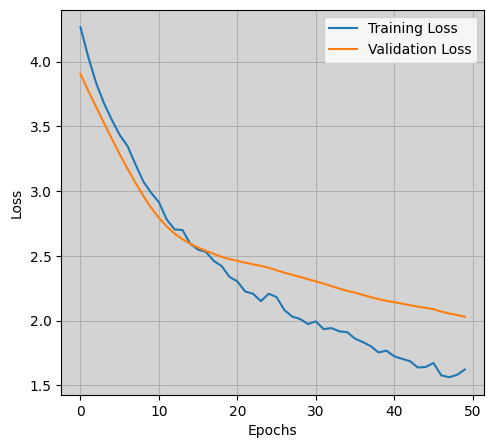

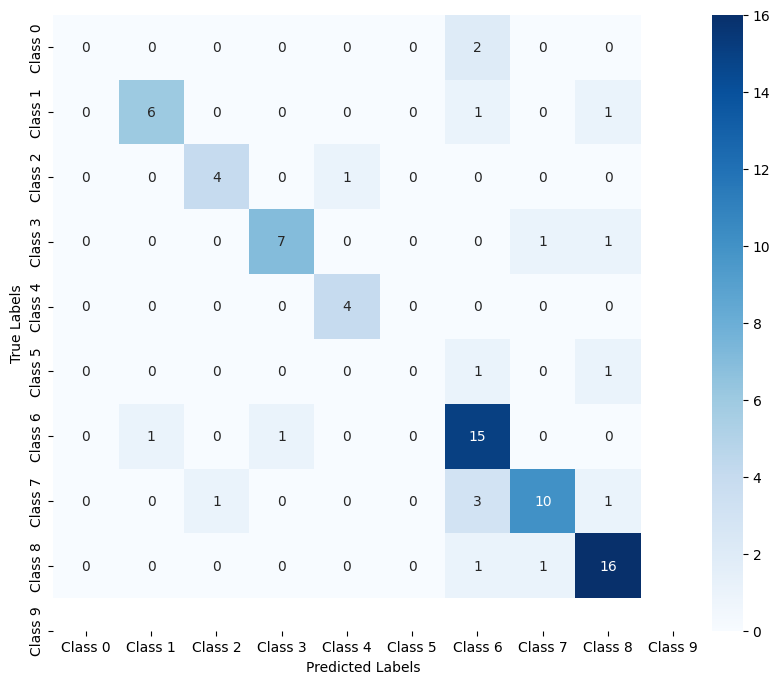

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Load dataset
df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/stack_output_base.csv')  
X = df.drop('y_test', axis=1).values
y = df['y_test'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to categorical (one-hot encoding)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/MOTIF_18_Aug/model_save/stack_multiclass_classifier_reduced.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,  # Increase epochs for better training
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, precision, recall
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Print classification report
print("Classification Report:")
try:
    print(classification_report(y_test_classes, y_pred_classes, target_names=[f'Class {i}' for i in range(num_classes)], zero_division=0))
except ValueError as e:
    print(f"Error in classification report: {e}")
    print(f"Unique classes in y_test: {np.unique(y_test_classes)}")
    print(f"Unique classes in y_pred: {np.unique(y_pred_classes)}")

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.title('Training vs. Validation Loss')

# Set grid and background color
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
plt.show()




In [5]:
# Save the trained model
model.save('/home/devnath/MOTIF_18_Aug/model_save/meta_classfier.h5')

In [6]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,288 (173.00 KB)

 Trainable params: 14,762 (57.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,526 (115.34 KB)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test .shape

((319, 31), (80, 31), (319, 10), (80, 10))

In [8]:
X.shape

(399, 31)